# Line Chart

This notebook contains examples of how to use the datachart package to create line charts.
The examples sequentially build on each other, going from simple to complex.

The line charts are created using the `LineChart` function found in the `charts` package. Let's import it:

In [1]:
import numpy as np
from datachart.charts import LineChart

The `LineChart` function is that accepts a `dict` object containing the chart attributes, as shown in the following examples.

NOTE: To avoid double figure generation, the `LineChart` function is preceded by the `_ =` operator. The double figures are generated because `LineChart` returns the `plt.Figure` object, which is then used to save the figure locally.

## Basic line chart

To create a basic line chart simply pass `dict` object containing only the `charts` attribute. The `charts` attribute value is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "data": [{                                            # A list of line data points
    "x":    Union[int, float],                          # The x-axis value
    "y":    Union[int, float],                          # The y-axis value
    "yerr": Optional[Union[int, float]]                 # The y-axis error value (to plot the confidence interval)
  }],
  "style": {                                            # The style of the line (optional)
    "plot_line_color":     Optional[str],               # The color of the line (hex color code)
    "plot_line_style":     Optional[LINE_STYLE],        # The line style (solid, dashed, etc.)
    "plot_line_marker":    Optional[LINE_MARKER],       # The marker style of the line (circle, square, etc.)
    "plot_line_width":     Optional[float],             # The width of the line
    "plot_line_alpha":     Optional[float],             # The alpha of the line (how visible the line is)
    "plot_line_drawstyle": Optional[LINE_DRAW_STYLE],   # The drawstyle of the line (step, steps-mid, etc.)
    "plot_line_zorder":    Optional[int],               # The zorder of the line
  },
  "subtitle": Optional[str],                            # The title of the chart
  "xlabel":   Optional[str],                            # The x-axis label
  "ylabel":   Optional[str],                            # The y-axis label

  "xticks": Optional[List[Union[int, float]]],          # the x-axis ticks
  "xticklabels": Optional[List[Union[str, float, str]], # the x-axis tick labels (must be same length as xticks)
  "xtickrotate": Optional[int],                         # the x-axis tick labels rotation
  "yticks": Optional[List[Union[int, float]]],          # the y-axis ticks
  "yticklabels": Optional[List[Union[str, float, str]], # the y-axis tick labels (must be same length as yticks)
  "ytickrotate": Optional[int],                         # the y-axis tick labels rotation

  "vlines": Optional[Union[dict, None]],                # the vertical lines
  "hlines": Optional[Union[dict, None]],                # the horizontal lines
}
```

### Draw only the line chart

The following example shows how only the `charts["data"]` attribute is required to draw the line chart.

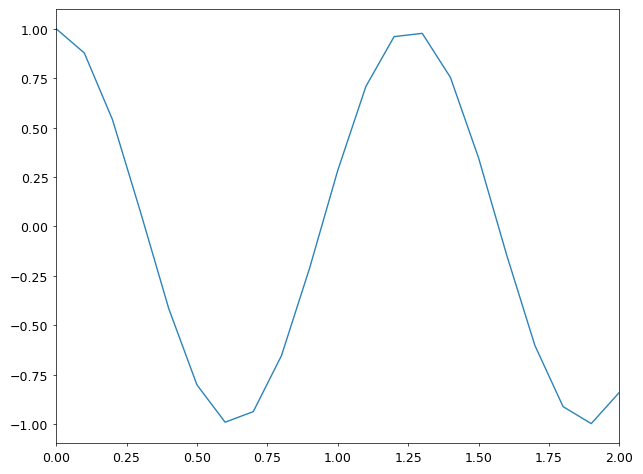

In [2]:
_ = LineChart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
        },

    }
)

### Add the title and the x and y labels

Adding the `title`, `xlabel` and `ylabel` attributes is straightforward.

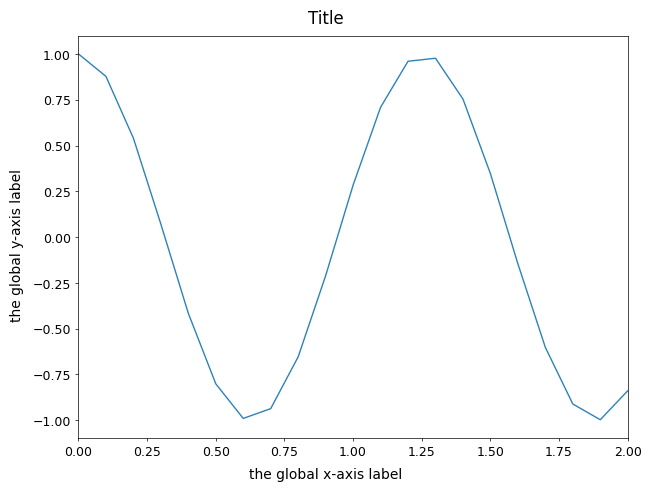

In [3]:
_ = LineChart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
    }
)

### Changing the figure size and adding the grid

To change the figure size, simply add the `figsize` attribute. The `figsize` attribute can be a tuple (width, height), values are in inches. There are some predefined `FIG_SIZE` constants in the `constants` package, to make it easier to use.

To add the grid, simply add the `show_grid` attribute. Possible options are:
- `"both"`: shows both the x-axis and the y-axis gridlines
- `"x"`: shows only the x-axis grid lines
- `"y"`: shows only the y-axis grid lines

In [4]:
from datachart.constants import FIG_SIZE

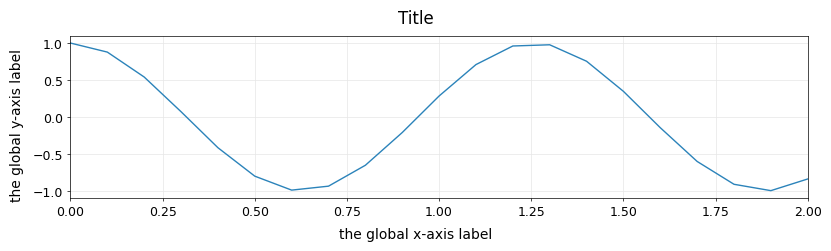

In [5]:
_ = LineChart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,  # must be a tuple (width, height), values are in inches
        "show_grid": "both",  # options: "both", "x", "y"
    }
)

### Changing the line style

To change a single line style simply add the `style` attribute with the corresponding attributes. The style attributes are:
- `"plot_line_color"`: The color of the line (hex color code)
- `"plot_line_alpha"`: The alpha of the line (how visible the line is)
- `"plot_line_width"`: The width of the line
- `"plot_line_style"`: The line style (solid, dashed, etc.)
- `"plot_line_marker"`: The marker style of the line (circle, square, etc.)
- `"plot_line_drawstyle"`: The drawstyle of the line (step, steps-mid, etc.)
- `"plot_line_zorder"`: The zorder of the line

Again, to help with the style settings, some constants are defined in the `constants` package, such as:
- `LINE_STYLE`: The line style (solid, dashed, etc.)
- `LINE_MARKER`: The marker style of the line (circle, square, etc.)
- `LINE_DRAW_STYLE`: The drawstyle of the line (step, steps-mid, etc.)

In [6]:
from datachart.constants import LINE_MARKER, LINE_STYLE

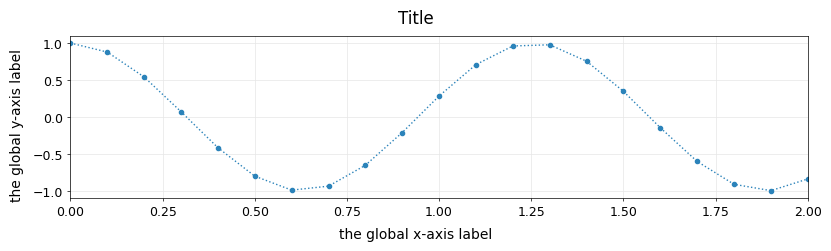

In [7]:
_ = LineChart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
            "style": {  # define the style of the lines
                "plot_line_marker": LINE_MARKER.POINT,
                "plot_line_style": LINE_STYLE.DOTTED,
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": "both",
    }
)

### Adding the area under the line

To add the area under the line, simply add the `show_area` attribute.

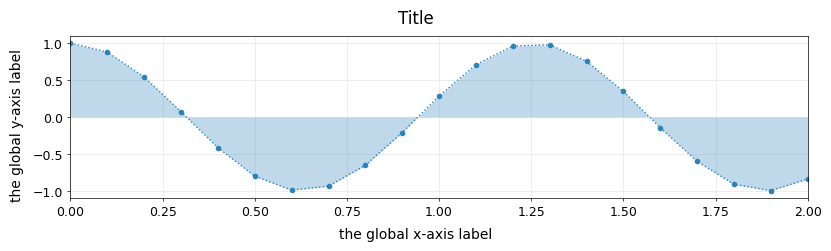

In [8]:
_ = LineChart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
            "style": {
                "plot_line_marker": LINE_MARKER.POINT,
                "plot_line_style": LINE_STYLE.DOTTED,
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": "both",
        "show_area": True,  # shows the area between the line and y=0
    }
)

### Adding vertical and horizontal lines

To add vertical and horizontal lines, you need to do the following steps:

**Adding vertical lines.** Within the `charts` dictionary, define the attribute `vlines`, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "x":    Union[int, float],                  # The x-axis value
  "ymin": Optional[Union[int, float]],        # The minimum y-axis value
  "ymax": Optional[Union[int, float]],        # The maximum y-axis value
  "style": {                                  # The style of the line (optional)
    "plot_vline_color": Optional[str],        # The color of the line (hex color code)
    "plot_vline_style": Optional[LINE_STYLE], # The line style (solid, dashed, etc.)
    "plot_vline_width": Optional[float],      # The width of the line
    "plot_vline_alpha": Optional[float],      # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                     # The label of the line
}
```

**Adding horizontal lines.** Within the `charts` dictionary, define the attribute `hlines`, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "y":    Union[int, float],                  # The y-axis value
  "xmin": Optional[Union[int, float]],        # The minimum x-axis value
  "xmax": Optional[Union[int, float]],        # The maximum x-axis value
  "style": {                                  # The style of the line (optional)
    "plot_hline_color": Optional[str],        # The color of the line (hex color code)
    "plot_hline_style": Optional[LINE_STYLE], # The line style (solid, dashed, etc.)
    "plot_hline_width": Optional[float],      # The width of the line
    "plot_hline_alpha": Optional[float],      # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                     # The label of the line
}
```


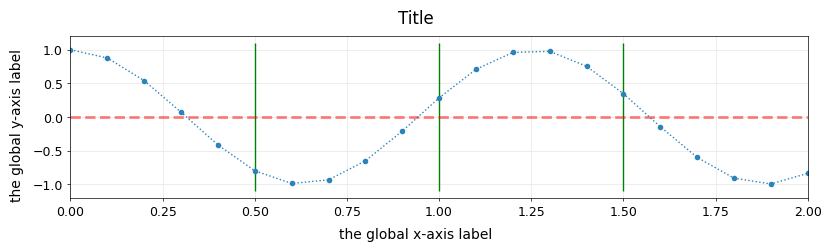

In [9]:
_ = LineChart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
            "style": {
                "plot_line_marker": LINE_MARKER.POINT,
                "plot_line_style": LINE_STYLE.DOTTED,
            },
            "vlines": [
                {
                    "x": 0.5 * i,
                    "style": {
                        "plot_vline_color": "green",
                        "plot_vline_style": LINE_STYLE.SOLID,
                        "plot_vline_width": 1,
                    }
                }
                for i in range(1, 4)
            ],
            "hlines": {
                "y": 0,
                "style": {
                    "plot_hline_color": "red",
                    "plot_hline_style": LINE_STYLE.DASHED,
                    "plot_hline_width": 2,
                    "plot_hline_alpha": 0.5,
                }
            }
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": "both",
    }
)

## Multiple line charts

To add multiple line charts, simply add the `charts` attribute with a list of charts, as shown below.

NOTE: Other attributes are the same as for when creating the single chart.

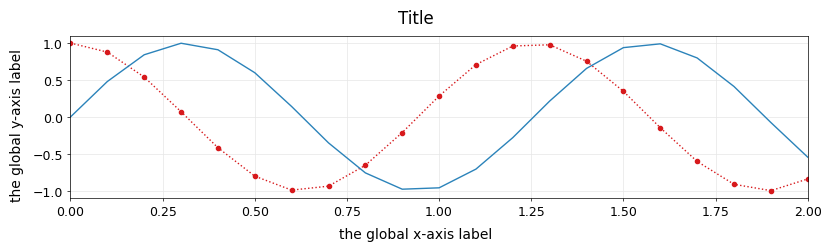

In [10]:
_ = LineChart(
    {
        # use a list of charts to define multiple lines
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_style": LINE_STYLE.DOTTED,
                },
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": "both",
    }
)

### Add a subtitle to each chart

To add a subtitle to each line, simply add the `subtitle` attribute to each required chart. In addition, to help with discerning which chart is which, use the `show_legend` attribute to show the legend of the charts.

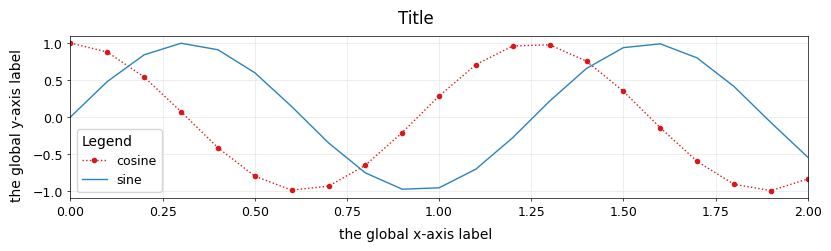

In [11]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_style": LINE_STYLE.DOTTED,
                },
                "subtitle": "cosine",  # add a subtitle to the line
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
                "subtitle": "sine",  # add a subtitle to the line
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": "both",
        "show_legend": True,  # show the legend
    }
)

### Show each chart in its own subplot

To draw multiple charts in each subplot, simply add the `subplots` attribute. The chart `subtitles` are then added at the top of each subplot, while the `title`, `xlabel` and `ylabel` are positioned to be common to all charts.

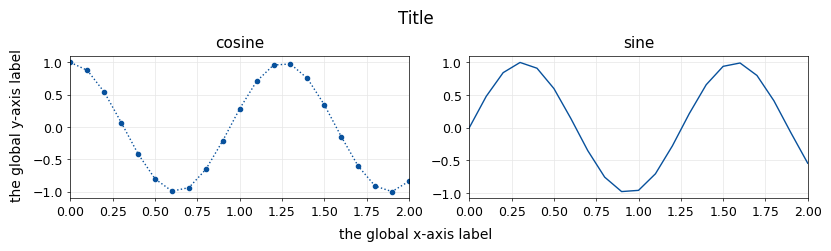

In [12]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_style": LINE_STYLE.DOTTED,
                },
                "subtitle": "cosine",
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
                "subtitle": "sine",
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "subplots": True,  # show each chart in its own subplot
        "show_grid": "both",
    }
)

### Sharing the x-axis and/or y-axis across subplots

To share the x-axis and/or y-axis across subplots, simply add the `sharex` and/or `sharey` attributes.

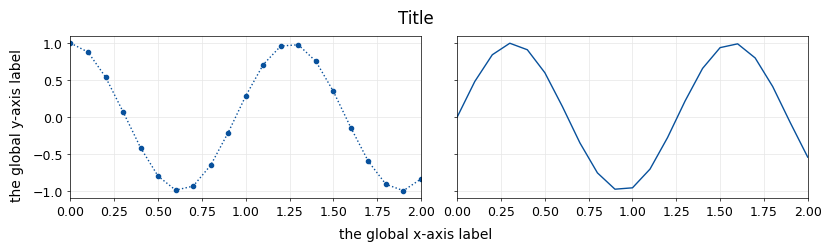

In [13]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_style": LINE_STYLE.DOTTED,
                },
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "sharex": True,  # share the x-axis across all subplots
        "sharey": True,  # share the y-axis across all subplots
        "figsize": FIG_SIZE.A4_NARROW,
        "subplots": True,
        "show_grid": "both",
    }
)

### Area under the subplots

Specifying the `show_area` attribute will show the area between the line and y=0 across all subplots.

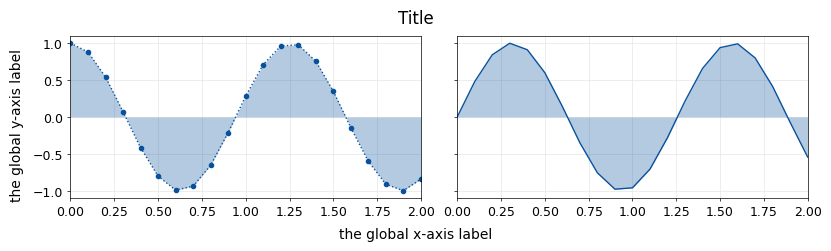

In [14]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_style": LINE_STYLE.DOTTED,
                },
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "sharex": True,
        "sharey": True,
        "figsize": FIG_SIZE.A4_NARROW,
        "subplots": True,
        "show_grid": "both",
        "show_area": True,  # show area between the line and y=0 for all subplots
    }
)

### Adding the confidence intervals

If a line chart has a confidence interval, it can be added by adding the `yerr` attribute to the chart's `data` attribute. Afterwards, the `show_yerr` attribute can be set to `True` to show the confidence interval.

In [15]:
import random

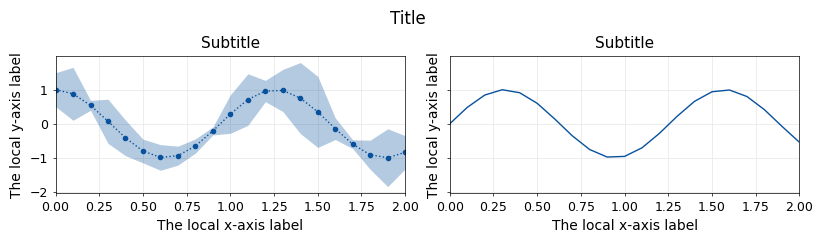

In [16]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [
                    # add the error values for each point's y value
                    {"x": x / 10, "y": np.cos(x / 2), "yerr": 0.1 + random.random()}
                    for x in range(21)
                ],
                "style": {
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_style": LINE_STYLE.DOTTED,
                },
                "subtitle": "Subtitle",
                "xlabel": "The local x-axis label",  # add local subplot x-axis label
                "ylabel": "The local y-axis label",  # add local subplot y-axis label
            },
            {
                "data": [
                    # note: not all lines require to have the error values
                    {"x": x / 10, "y": np.sin(x / 2)}
                    for x in range(21)
                ],
                "subtitle": "Subtitle",
                "xlabel": "The local x-axis label",  # add local subplot x-axis label
                "ylabel": "The local y-axis label",  # add local subplot y-axis label
            },
        ],
        "title": "Title",
        # "xlabel": "the global x-axis label",
        # "ylabel": "the global y-axis label",
        "sharex": True,
        "sharey": True,
        "figsize": FIG_SIZE.A4_NARROW,
        "subplots": True,
        "show_grid": "both",
        "show_yerr": True,  # show the confidence interval using the error values
    }
)

## Configuring the global style

In [17]:
from datachart.themes import DEFAULT_THEME

In [18]:
DEFAULT_THEME

{'color_general_singular': 'blue',
 'color_general_multiple': 'spectral',
 'font_general_family': 'sans-serif',
 'font_general_sansserif': ['Helvetica', 'Arial'],
 'font_general_color': '#000000',
 'font_general_size': 11,
 'font_general_style': 'normal',
 'font_general_weight': 'normal',
 'font_title_size': 12,
 'font_title_color': '#000000',
 'font_title_style': 'normal',
 'font_title_weight': 'normal',
 'font_subtitle_size': 11,
 'font_subtitle_color': '#000000',
 'font_subtitle_style': 'normal',
 'font_subtitle_weight': 'normal',
 'font_xlabel_size': 10,
 'font_xlabel_color': '#000000',
 'font_xlabel_style': 'normal',
 'font_xlabel_weight': 'normal',
 'font_ylabel_size': 10,
 'font_ylabel_color': '#000000',
 'font_ylabel_style': 'normal',
 'font_ylabel_weight': 'normal',
 'axes_spines_top_visible': True,
 'axes_spines_right_visible': True,
 'axes_spines_bottom_visible': True,
 'axes_spines_left_visible': True,
 'axes_spines_width': 0.5,
 'axes_spines_zorder': 100,
 'axes_ticks_leng

### Updating the global style

To configure the global style, import the `config` module and use the `update_config` function.	This function accepts any viable style attribute as defined in the `DEFAULT_THEME` dictionary.

In [19]:
from datachart.config import config

from datachart.constants import FONT_WEIGHT

In [20]:
# update the global configuration
# note: this will update the style for all charts
config.update_config(
    config={
        "font_general_sansserif": ["Inter"],
        "font_title_weight": FONT_WEIGHT.BOLD,
        "plot_line_style": LINE_STYLE.SOLID,
        "axes_spines_top_visible": False,
        "axes_spines_left_visible": False,
        "axes_spines_right_visible": False,
        "axes_spines_width": 1,
    }
)

After updating the global style, it will be applied in all future charts in the script/notebook.

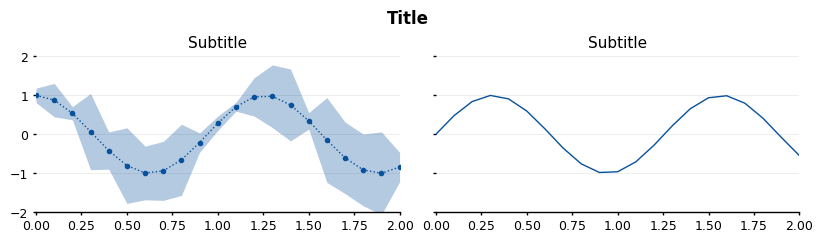

In [21]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [
                    {"x": x / 10, "y": np.cos(x / 2), "yerr": 0.1 + random.random()}
                    for x in range(21)
                ],
                "style": {
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_style": LINE_STYLE.DOTTED,
                },
                "subtitle": "Subtitle",
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
                "subtitle": "Subtitle",
            },
        ],
        "title": "Title",
        "sharex": True,
        "sharey": True,
        "ymin": -2,  # the minimum value of the y-axis
        "ymax": 2,  # the maximum value of the y-axis
        "figsize": FIG_SIZE.A4_NARROW,
        "subplots": True,
        "show_grid": "y",
        "show_yerr": True,
    }
)

### Reseting the global style

You can use the `reset_config` function to reset the global configuration.

In [22]:
# resets the global configuration
config.reset_config()

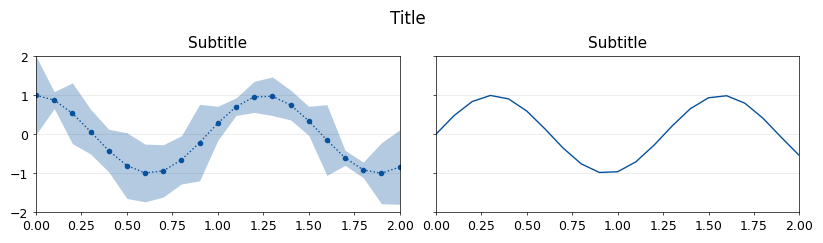

In [23]:
figure = LineChart(
    {
        "charts": [
            {
                "data": [
                    {"x": x / 10, "y": np.cos(x / 2), "yerr": 0.1 + random.random()}
                    for x in range(21)
                ],
                "subtitle": "Subtitle",
                "style": {
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_style": LINE_STYLE.DOTTED,
                },
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
                "subtitle": "Subtitle",
            },
        ],
        "title": "Title",
        "sharex": True,
        "sharey": True,
        "figsize": FIG_SIZE.A4_NARROW,
        "subplots": True,
        "ymin": -2,
        "ymax": 2,
        "show_grid": "y",
        "show_yerr": True,
    }
)

## Saving the chart as an image

To save the chart as an image, use the `save_figure` function, found in the `utils.figure` module.

In [24]:
from datachart.utils import save_figure

In [25]:
save_figure(figure, "./fig_line_chart.png", dpi=300)

## Example use cases

### Example 1: ROC curve

The example below shows how to create a ROC curve. Note that the `charts["data"]` contains the attributes `tp` and `fp`. To specify which values are which, you can specify the `x` and `y` attributes outside the `data` attribute. This way, the function will know which value to use for the x- and y-axis.

In [26]:
from datachart.constants import HATCH_STYLE

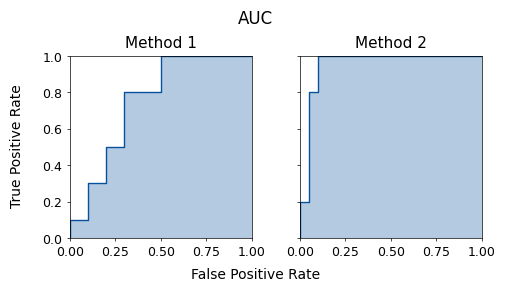

In [27]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [
                    {"tp": 0, "fp": 0},
                    {"tp": 0.1, "fp": 0},
                    {"tp": 0.1, "fp": 0.1},
                    {"tp": 0.3, "fp": 0.1},
                    {"tp": 0.3, "fp": 0.2},
                    {"tp": 0.5, "fp": 0.2},
                    {"tp": 0.5, "fp": 0.3},
                    {"tp": 0.8, "fp": 0.3},
                    {"tp": 0.8, "fp": 0.5},
                    {"tp": 1.0, "fp": 0.5},
                    {"tp": 1.0, "fp": 1.0},
                ],
                "subtitle": "Method 1",
                "x": "fp",  # specify which attr to use for x
                "y": "tp",  # specify which attr to use for y
                "style": {"plot.area.hatch": HATCH_STYLE.DIAGONAL},
            },
            {
                "data": [
                    {"tp": 0, "fp": 0},
                    {"tp": 0.2, "fp": 0},
                    {"tp": 0.2, "fp": 0.05},
                    {"tp": 0.8, "fp": 0.05},
                    {"tp": 0.8, "fp": 0.1},
                    {"tp": 1.0, "fp": 0.1},
                    {"tp": 1.0, "fp": 1.0},
                ],
                "subtitle": "Method 2",
                "x": "fp",  # specify which attr to use for x
                "y": "tp",  # specify which attr to use for y
                "style": {"plot.area.hatch": HATCH_STYLE.DIAGONAL},
            },
        ],
        "title": "AUC",
        "xlabel": "False Positive Rate",
        "ylabel": "True Positive Rate",
        "sharex": True,
        "sharey": True,
        "show_area": True,
        "subplots": True,
        "aspect_ratio": "equal",  # assign the aspect ratio of all subplots
        "figsize": (5, 2.8),
        "xmin": 0,  # the minimum value of the x-axis
        "xmax": 1,  # the maximum value of the x-axis
        "ymin": 0,  # the minimum value of the y-axis
        "ymax": 1,  # the maximum value of the y-axis
    }
)

### Example 2: Training loss

The following example shows how to create a training loss chart. As in the previous example, the `charts["data"]` contains other attributes, such as `step` and `loss`. 

In [28]:
from datachart.constants import COLORS

In [29]:
config.update_config(config={"color_general_multiple": COLORS.MixedDark})

NOTE: The figure below will be saved as an image in the following section.

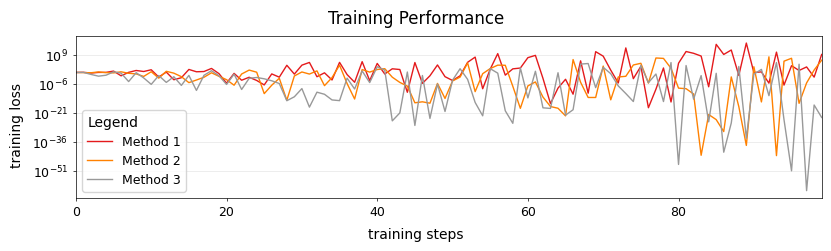

In [30]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [
                    {"step": step, "loss": (0.5 + random.random()) ** step}
                    for step in range(100)
                ],
                "x": "step",  # specify which attr to use for x
                "y": "loss",  # specify which attr to use for y
                "subtitle": "Method 1",
            },
            {
                "data": [
                    {"step": step, "loss": (0.3 + random.random()) ** step}
                    for step in range(100)
                ],
                "x": "step",  # specify which attr to use for x
                "y": "loss",  # specify which attr to use for y
                "subtitle": "Method 2",
            },
            {
                "data": [
                    {"step": step, "loss": (0.2 + random.random()) ** step}
                    for step in range(100)
                ],
                "x": "step",  # specify which attr to use for x
                "y": "loss",  # specify which attr to use for y
                "subtitle": "Method 3",
            },
        ],
        "title": "Training Performance",
        "xlabel": "training steps",
        "ylabel": "training loss",
        "subplots": False,
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": "y",
        "show_legend": True,
        "log_scale": True,  # depict the y-axis as a log scale
    }
)